# Inventory Management Visualisation

## Purpose:

The purpose of this project is to utilize data visualization techniques to extract and analyze key insights from an inventory management system. By examining sales trends, product performance, and supplier contributions, this project aims to provide a comprehensive understanding of the inventory dynamics. These insights are crucial for making informed decisions regarding inventory management, supplier relationships, and sales strategies, ultimately contributing to the optimization of business operations.

### Step 0: Installing Dependencies

In [2]:
%pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [17]:
%pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------------------ --------------- 184.3/294.9 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Step 1: Importing the necessary Packages.


In [26]:
# Example Python code for connecting to MySQL database using mysql-connector-python
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Connect to the Database

In [32]:
# Database connection
connection = mysql.connector.connect(
    user='root',
    password='admin',
    host='localhost',
    database='inventory'
)

### Step 3: Check for any inconsistency.

In [37]:
# Database connection
connection = mysql.connector.connect(
    user='root',
    password='admin',
    host='localhost',
    database='inventory'
)
# Create a cursor object to execute SQL queries
cursor = connection.cursor(buffered=True)

# Query data from the 'Categories' table
cursor.execute('SELECT * FROM Categories')
categories = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'Customers' table
cursor.execute('SELECT * FROM Customers')
customers = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'OrderDetails' table
cursor.execute('SELECT * FROM OrderDetails')
order_details = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'Orders' table
cursor.execute('SELECT * FROM Orders')
orders = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'Products' table
cursor.execute('SELECT * FROM Products')
products = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Query data from the 'Suppliers' table
cursor.execute('SELECT * FROM Suppliers')
suppliers = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Close the cursor and connection
cursor.close()
connection.close()

### Step 4: Data Visualisation

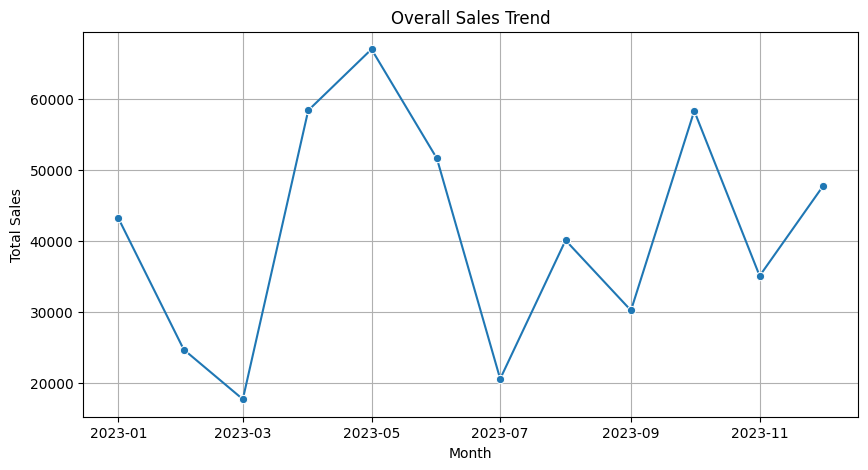

In [38]:
# Database connection
connection = mysql.connector.connect(
    user='root',
    password='admin',
    host='localhost',
    database='inventory'
)
# Convert OrderDate to datetime
orders['OrderDate'] = pd.to_datetime(orders['OrderDate'])

# Aggregate total sales by month, ensuring only numeric columns are summed
monthly_sales = orders.groupby(orders['OrderDate'].dt.to_period('M'))['TotalAmount'].sum().reset_index()
monthly_sales['OrderDate'] = monthly_sales['OrderDate'].dt.to_timestamp()

# Plot overall sales trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='OrderDate', y='TotalAmount', marker='o')
plt.title('Overall Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


C:\Users\N Jagadish Baliga\AppData\Local\Temp\ipykernel_24172\1826577627.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  category_sales_df = pd.read_sql(query_category_sales, connection)


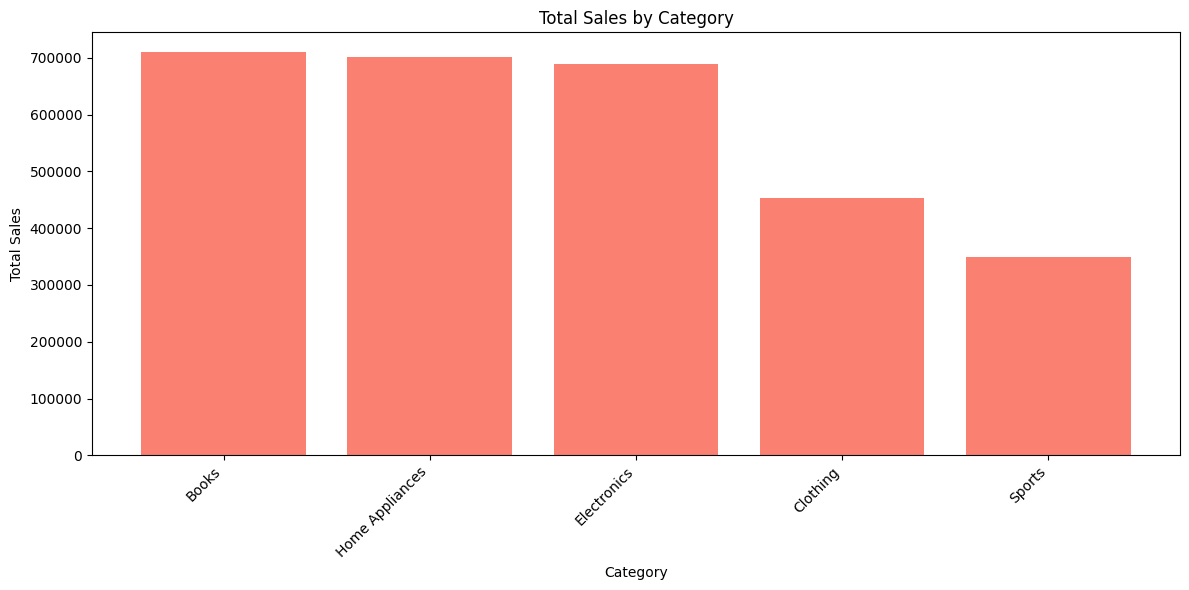

In [39]:
# Database connection
connection = mysql.connector.connect(
    user='root',
    password='admin',
    host='localhost',
    database='inventory'
)

query_category_sales = """
SELECT c.CategoryName, SUM(od.Quantity * od.UnitPrice) as TotalSales
FROM categories c
JOIN products p ON c.CategoryID = p.CategoryID
JOIN orderdetails od ON p.ProductID = od.ProductID
GROUP BY c.CategoryName
ORDER BY TotalSales DESC
"""
category_sales_df = pd.read_sql(query_category_sales, connection)

# Plot total sales by category
plt.figure(figsize=(12, 6))
plt.bar(category_sales_df['CategoryName'], category_sales_df['TotalSales'], color='salmon')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\N Jagadish Baliga\AppData\Local\Temp\ipykernel_24172\1499051120.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  monthly_sales_df = pd.read_sql(query_monthly_sales, connection)


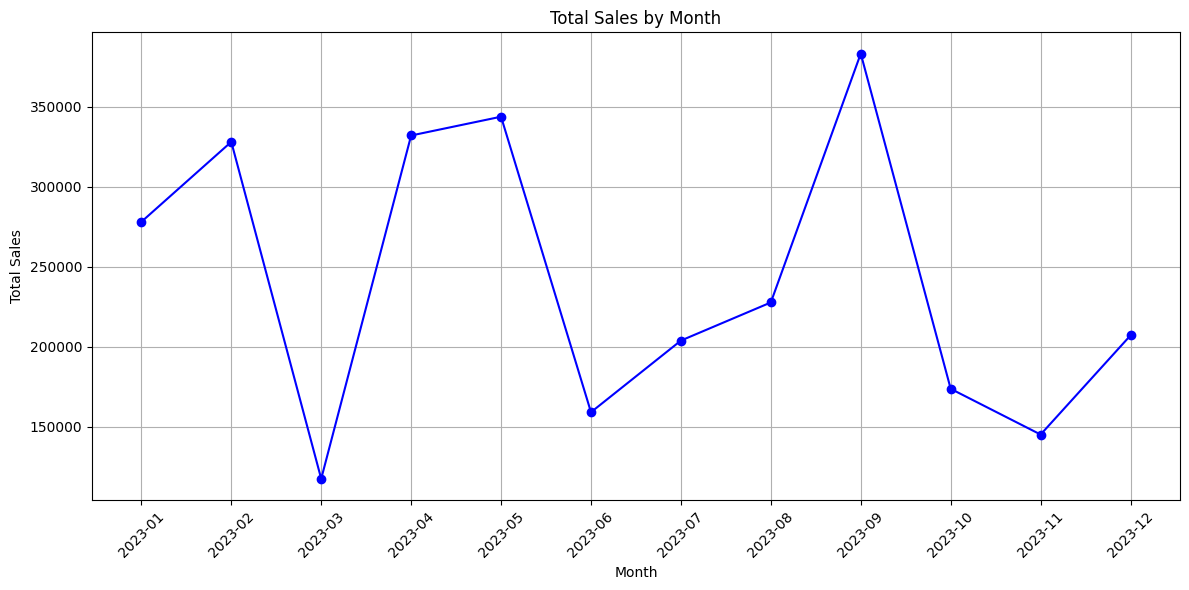

In [33]:
# Query to get total sales by month
query_monthly_sales = """
SELECT DATE_FORMAT(o.OrderDate, '%Y-%m') as OrderMonth, SUM(od.Quantity * od.UnitPrice) as TotalSales
FROM orders o
JOIN orderdetails od ON o.OrderID = od.OrderID
GROUP BY OrderMonth
ORDER BY OrderMonth
"""
monthly_sales_df = pd.read_sql(query_monthly_sales, connection)

# Plot total sales by month
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_df['OrderMonth'], monthly_sales_df['TotalSales'], marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\N Jagadish Baliga\AppData\Local\Temp\ipykernel_24172\835562592.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_selling_products = pd.read_sql(query, connection)


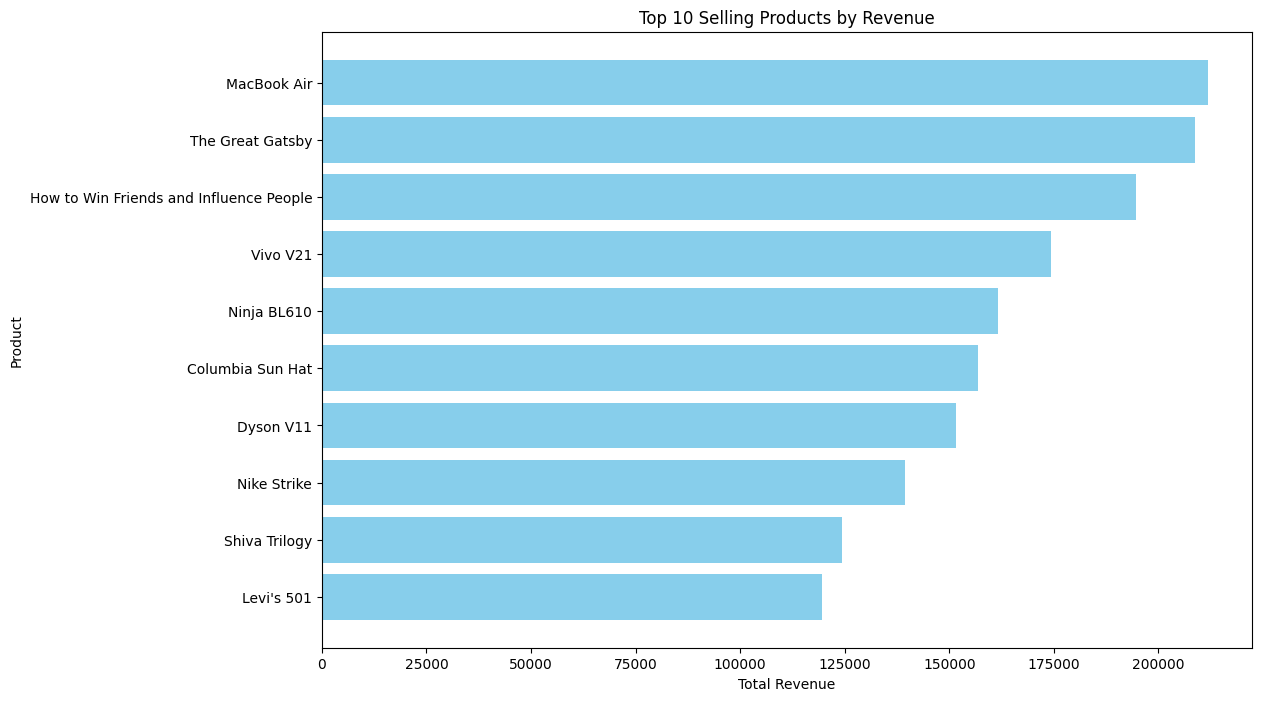

In [34]:
# Query to get top 10 selling products by revenue
query = """
SELECT p.ProductName, SUM(od.Quantity * od.UnitPrice) as TotalRevenue
FROM products p
JOIN orderdetails od ON p.ProductID = od.ProductID
GROUP BY p.ProductName
ORDER BY TotalRevenue DESC
LIMIT 10
"""

# Read data into a DataFrame
top_selling_products = pd.read_sql(query, connection)

# Close the database connection
connection.close()

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_selling_products['ProductName'], top_selling_products['TotalRevenue'], color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.title('Top 10 Selling Products by Revenue')
plt.gca().invert_yaxis()  # Invert y-axis to show the product with the highest revenue at the top
plt.show()

C:\Users\N Jagadish Baliga\AppData\Local\Temp\ipykernel_24172\2262476808.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_order_value_df = pd.read_sql(query_avg_order_value, connection)


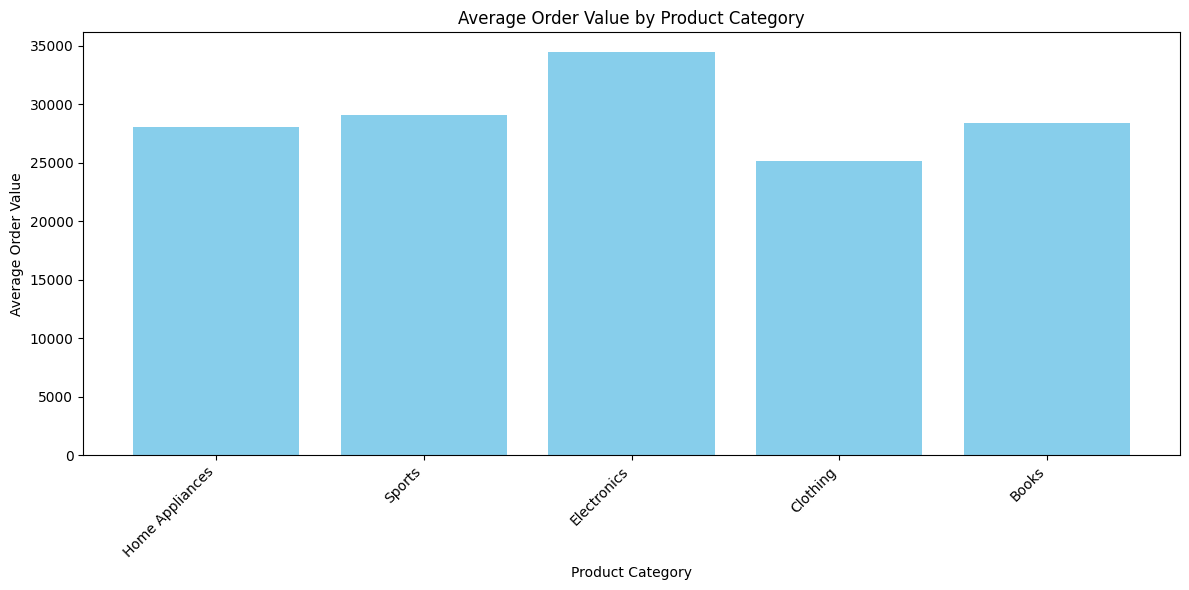

In [43]:
# SQL query to retrieve average order value by product category
query_avg_order_value = """
SELECT c.CategoryName, AVG(od.Quantity * od.UnitPrice) as AvgOrderValue
FROM categories c
JOIN products p ON c.CategoryID = p.CategoryID
JOIN orderdetails od ON p.ProductID = od.ProductID
GROUP BY c.CategoryName
"""

# Read data from MySQL into a DataFrame
avg_order_value_df = pd.read_sql(query_avg_order_value, connection)

# Plot average order value by product category
plt.figure(figsize=(12, 6))
plt.bar(avg_order_value_df['CategoryName'], avg_order_value_df['AvgOrderValue'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Average Order Value')
plt.title('Average Order Value by Product Category')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


C:\Users\N Jagadish Baliga\AppData\Local\Temp\ipykernel_24172\486162603.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  delivery_time_df = pd.read_sql(query_delivery_time, connection)


Average Delivery Time (in days): 4.78


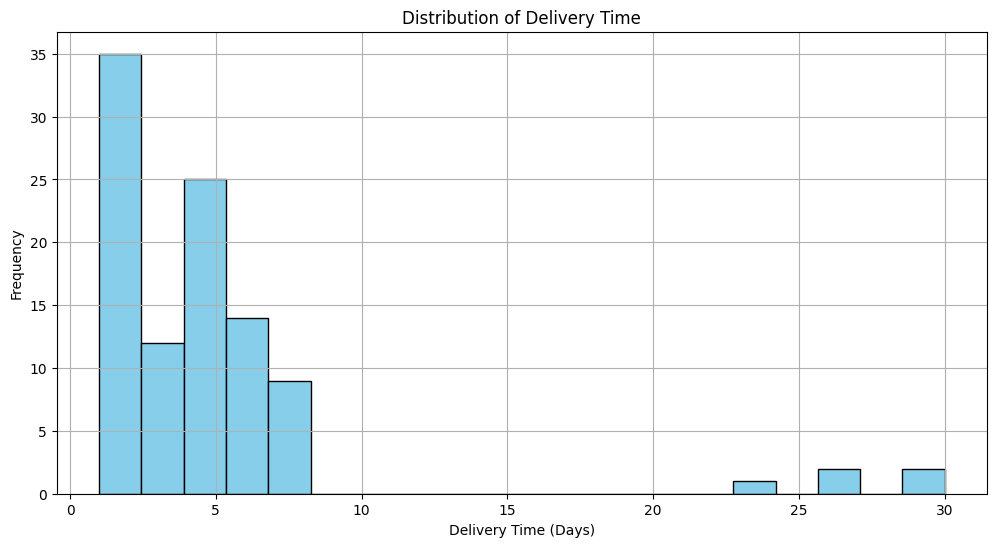

In [46]:
# SQL query to retrieve order placement and delivery timestamps
query_delivery_time = """
SELECT OrderID, TIMESTAMPDIFF(DAY, OrderDate, ShippingDate
) as DeliveryTime
FROM orders
"""

# Read data from MySQL into a DataFrame
delivery_time_df = pd.read_sql(query_delivery_time, connection)

# Calculate average delivery time
average_delivery_time = delivery_time_df['DeliveryTime'].mean()

# Print the average delivery time
print("Average Delivery Time (in days):", average_delivery_time)

# Plotting
plt.figure(figsize=(12, 6))
plt.hist(delivery_time_df['DeliveryTime'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Time')
plt.grid(True)
plt.show()


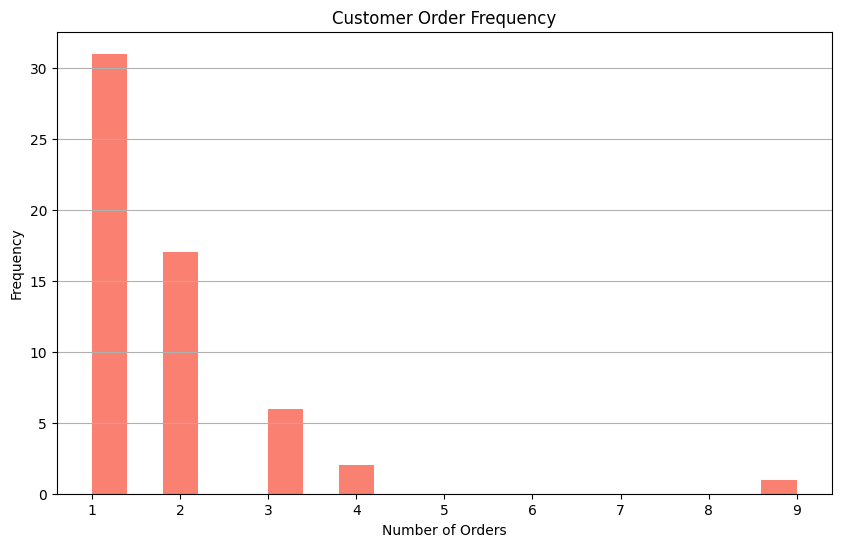

In [53]:
# Counting orders per customer
customer_order_freq = orders['CustomerID'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
customer_order_freq.plot(kind='hist', bins=20, color='salmon')
plt.title('Customer Order Frequency')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


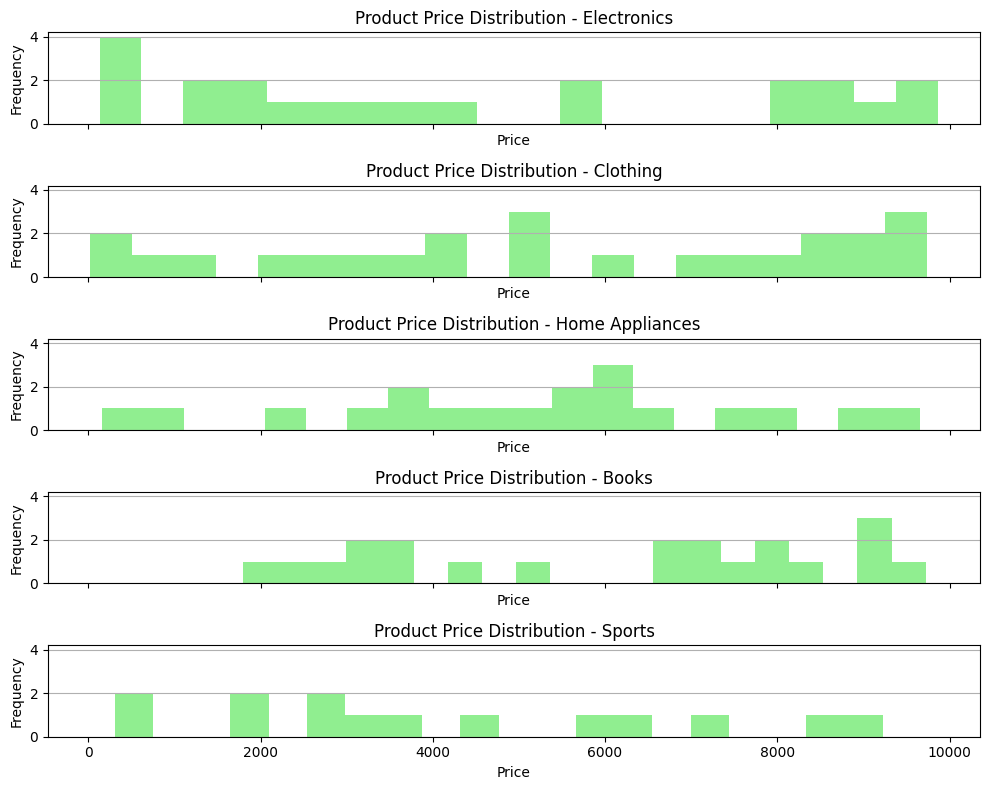

In [59]:
import matplotlib.pyplot as plt

# Define the number of bins for the histogram
num_bins = 20

# Create subplots for each category
fig, axs = plt.subplots(len(categories), figsize=(10, 8), sharex=True, sharey=True)

# Iterate over each category
for i, (category_id, category_name) in enumerate(zip(categories['CategoryID'], categories['CategoryName'])):
    # Filter products for the current category
    category_products = products[products['CategoryID'] == category_id]
    
    # Plot histogram for product prices in the current category
    axs[i].hist(category_products['Price'], bins=num_bins, color='lightgreen')
    axs[i].set_title(f'Product Price Distribution - {category_name}')
    axs[i].set_xlabel('Price')
    axs[i].set_ylabel('Frequency')
    axs[i].grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()


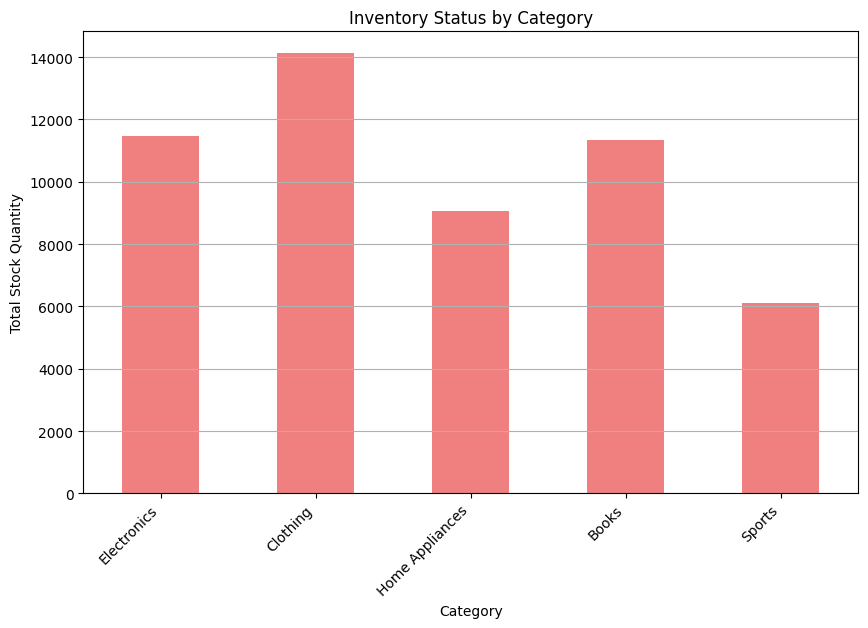

In [61]:
# Grouping by category and summing up stock quantity
category_inventory = products.groupby('CategoryID')['StockQuantity'].sum()

# Mapping category IDs to category names
category_inventory.index = category_inventory.index.map(categories.set_index('CategoryID')['CategoryName'])

# Plotting
plt.figure(figsize=(10, 6))
category_inventory.plot(kind='bar', color='lightcoral')
plt.title('Inventory Status by Category')
plt.xlabel('Category')
plt.ylabel('Total Stock Quantity')
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment of x-labels
plt.grid(axis='y')
plt.show()



C:\Users\N Jagadish Baliga\AppData\Local\Temp\ipykernel_24172\3345702243.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  categories_df = pd.read_sql(query_categories, connection)
C:\Users\N Jagadish Baliga\AppData\Local\Temp\ipykernel_24172\3345702243.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_df = pd.read_sql(query_revenue, connection)


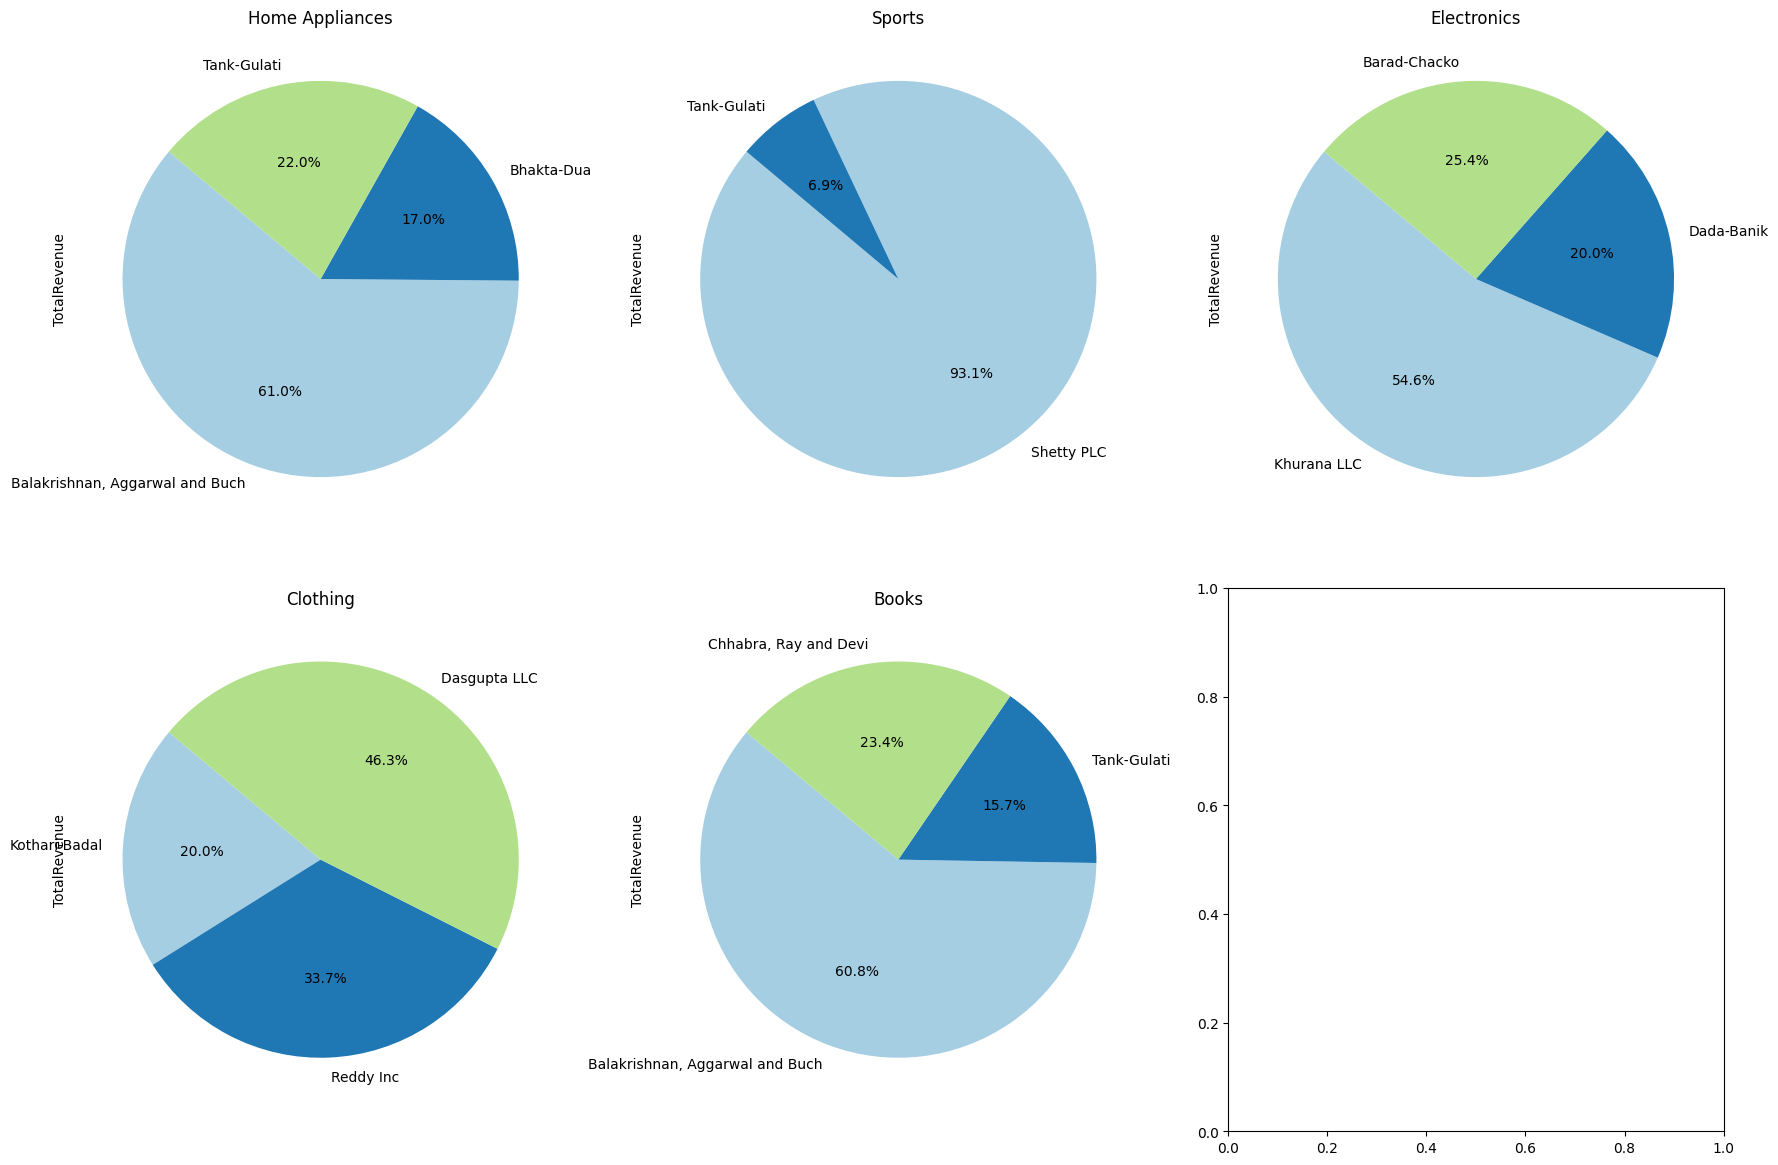

In [69]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt

# Establish a connection to the MySQL database
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='admin',
    database='inventory')

# Query to fetch category names
query_categories = """
SELECT 
    CategoryID, 
    CategoryName
FROM 
    Categories
"""

# Read category names into a DataFrame
categories_df = pd.read_sql(query_categories, connection)

# Create a dictionary to map CategoryID to CategoryName
category_names_map = dict(zip(categories_df['CategoryID'], categories_df['CategoryName']))

# Query to join the necessary tables
query_revenue = """
SELECT 
    p.CategoryID, 
    s.SupplierName, 
    SUM(od.TotalPrice) as TotalRevenue
FROM 
    OrderDetails od
JOIN 
    Orders o ON od.OrderID = o.OrderID
JOIN 
    Products p ON od.ProductID = p.ProductID
JOIN 
    Suppliers s ON p.SupplierID = s.SupplierID
GROUP BY 
    p.CategoryID, s.SupplierName
"""

# Read data into a DataFrame
data_df = pd.read_sql(query_revenue, connection)

# Close the connection
connection.close()

# Get unique category IDs
category_ids = data_df['CategoryID'].unique()

# Plotting pie chart for each category
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.5)

for i, category_id in enumerate(category_ids, 1):
    category_data = data_df[data_df['CategoryID'] == category_id]
    if not category_data.empty:
        ax = axes[(i-1)//3, (i-1)%3]
        category_data.set_index('SupplierName')['TotalRevenue'].plot(kind='pie', autopct='%1.1f%%', startangle=140, ax=ax, colors=plt.cm.Paired.colors)
        ax.set_title(category_names_map.get(category_id, f"Category {category_id}"))

plt.tight_layout()
plt.show()


In [ ]:
# Close database connection
connection.close()

### Conclusion

This project successfully highlights the power of data visualization in uncovering valuable insights from inventory data. The visualizations reveal significant sales trends, product performance metrics, and supplier contributions, offering a clear and actionable understanding of the inventory landscape. These findings can help businesses enhance their inventory management practices, strengthen supplier partnerships, and refine their sales strategies, leading to improved efficiency and profitability.